# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo
**Elaborado por Marcelo Márquez Murillo - A01720588, para la clase TC3006C.101**

**Dataset**
*Diabetes Healthcare: Comprehensive Dataset*
El Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (NIDDK), es una institución dedicada a la investigación y desarrollo de tratamientos médicos para enfermedades crónicas. Con el propósito de avanzar en la comprensión y predicción de pacientes propensos a padecer diabetes, han establecido una base de datos que recopila información de salud de diversos pacientes, así como su estado de salud en relación con la diabetes. Esta base de datos se emplea para entrenar un modelo de Aprendizaje Automático (Machine Learning) con el fin de mejorar la precisión de los diagnósticos relacionados con esta enfermedad.

**Cantidad de registros: 768**
La base de datos contiene la siguiente información por paciente:
* Variables independientes
* Pregnancies - número de veces que la paciente se haya embarazado.
* Glucose - concentración de glucosa en el cuerpo del paciente.
* BloodPressure - Presión arterial del paciente.
* SkinThickness - Grosor del pliegue cutáneo del tríceps.
* Insulin - Suero de insulina.
* BMI - Body Mass Index (Índice de masa corporal).
* DiabetesPedigreeFunction - Función del pedigrí de la diabetes
* Age - Edad del paciente.
* Variable dependiente
* Outcome - Variable de clase binaria, 1 representa que el paciente tiene diabetes y 0 significa que no tiene diabetes.

Link al dataset: https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset?datasetId=3546399&sortBy=voteCount  
Este dataset tiene la licencia: *Database Contents License (DbCL) v1.0*


**Modelo utilizado**
La elección del modelo de regresión logística múltiple (clasificación binaria) se fundamenta en su capacidad para manejar eficazmente variables dependientes de naturaleza binaria, como es el caso de nuestro "Outcome" que indica la presencia o ausencia de diabetes. Además, este modelo es especialmente apto para interpretar relaciones complejas entre múltiples variables independientes numéricas, como las que se presentan en nuestro conjunto de datos. La regresión logística múltiple no solo proporciona una métrica de probabilidad para la clasificación, sino que también permite una comprensión más profunda de las interacciones entre las variables, lo cual es crucial para la toma de decisiones médicas basadas en datos. Este enfoque se alinea con el objetivo de mejorar la precisión diagnóstica en el ámbito de la atención sanitaria para la diabetes.


**Métricas a utilizar**
* Matriz de confusión: Una tabla que muestra las cuatro posibles combinaciones de resultados predichos y reales.
    - Verdaderos Positivos (VP): Casos positivos correctamente identificados por el modelo.
    - Falsos Positivos (FP): Casos negativos incorrectamente identificados como positivos.
    - Verdaderos Negativos (VN): Casos negativos correctamente identificados por el modelo.
    - Falsos Negativos (FN): Casos positivos incorrectamente identificados como negativos.
* Exactitud (*Accuracy*): Indica el porcentaje de predicciones correctas del total de predicciones.
* Precisión (*Precision*): De todas las predicciones positivas que realizó el modelo, muestra el porcentaje que fueron correctas.
* Sensibilidad (*Recall*): De todos los casos positivos reales, muestra el porcentaje que el modelo logró identificar correctamente.
* Puntaje F1 (*F1 Score*): Es el promedio armónico entre la precisión y la sensibilidad, ofreciendo un balance entre ambas métricas.

Cada una de estas métricas ofrece una perspectiva diferente sobre el rendimiento del modelo, y juntas brindan una visión comprensiva de cómo está funcionando el modelo en diferentes aspectos. Es importante considerar todas estas métricas para obtener una comprensión completa del rendimiento del modelo.

In [31]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
%matplotlib inline

In [32]:
# Leemos el archivo framingham.csv
df = pd.read_csv('health_care_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
# Utilizamos la media sin ceros en los valores faltantes de las columnas especificadas
mean_glucose = df[df["Glucose"] != 0]["Glucose"].mean()
df["Glucose"].replace(0, mean_glucose, inplace=True)
mean_blood_pressure = df[df["BloodPressure"] != 0]["BloodPressure"].mean()
df["BloodPressure"].replace(0, mean_blood_pressure, inplace=True)
mean_skin_thickness = df[df["SkinThickness"] != 0]["SkinThickness"].mean()
df["SkinThickness"].replace(0, mean_skin_thickness, inplace=True)
mean_insulin = df[df["Insulin"] != 0]["Insulin"].mean()
df["Insulin"].replace(0, mean_insulin, inplace=True)
mean_bmi = df[df["BMI"] != 0]["BMI"].mean()
df["BMI"].replace(0, mean_bmi, inplace=True)

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


## Separación de datos (Train/Test/Validation)

Se decidió separar los datos de la siguiente manera:
* Datos de entrenamiento: 70%
* Datos de validación: 21%
* Datos de prueba: 9%

Esta separación es adecuada para garantizar que el modelo tenga suficientes datos para aprender, mientras se reserva una parte para la validación y la prueba.

In [36]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, train_size=0.7, test_size=0.3, random_state=42, stratify=y_temp)

# Utilizamos SMOTE para agregar valores sintéticos a la clase 1
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Revisamos cuantos valores son 1s y 0s
print(f"1: {(y_train == 1).sum()}")
print(f"0: {(y_train == 0).sum()}")

print('Tamaño de entrenamiento:', len(X_train))
print('Tamaño de validación:', len(X_val))
print('Tamaño de prueba:', len(X_test))

1: 350
0: 350
Tamaño de entrenamiento: 700
Tamaño de validación: 70
Tamaño de prueba: 161


## Entrenamiento del modelo

Para poder conseguir los mejores hiper parámetros, hacemos uso de la herramienta GridSearchCV donde le agregamos diferentes combinaciones de parámetros a utilizar.

* C: 
* penalty:
* solver:
* l1_ratio:

In [37]:
# Hiper parámetros a probar
param_grid = [
    {
        'C': [0.001, 0.01, 0.1, 0.6, 1],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    {
        'C': [0.001, 0.01, 0.1, 0.6, 1],
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.2, 0.5, 0.8]
    },
    {
        'C': [0.001, 0.01, 0.1, 0.6, 1],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'newton-cg', 'sag'],
    },
]

# Instanciar la clase de regresión logística
logreg = LogisticRegression(max_iter=1000000000, tol=1e-4, random_state=42)

# Instanciar el grid search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# Entrenamos el modelo con grid search
grid_search.fit(X_train, y_train)

# Conseguimos los mejores parámetros y estimador
best_params = grid_search.best_params_
opt_logreg = grid_search.best_estimator_

print(f'Mejores parámetros: {best_params}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'C': 0.6, 'penalty': 'l2', 'solver': 'lbfgs'}


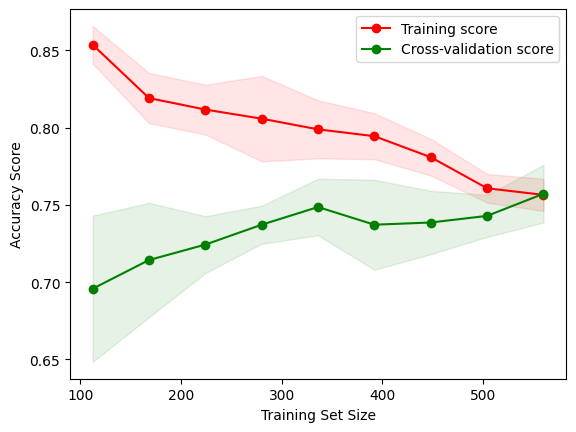

Validation Score: 0.7714285714285715


In [38]:
# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    opt_logreg, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular media y desviación estándar para el set de entrenamiento
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calcular media y desviación estándar para el set de valoración
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Graficar learning curves
plt.figure()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

# Validamos el model usando los datos de X_val y y_val
val_score = opt_logreg.score(X_val, y_val)
print(f'Validation Score: {val_score}')

## Diagnósticos

In [39]:
# Conseguimos el nivel de sesgo
if train_mean[-1] < 0.7:
    print("Sesgo alto")
elif 0.7 <= train_mean[-1] < 0.9:
    print("Sesgo medio")
else:
    print("Sesgo bajo")

Sesgo medio


In [40]:
# Diagnóstico de varianza
gap = train_mean[-1] - val_mean[-1]
if gap > 0.2:
    print("Alta varianza")
elif 0.1 < gap <= 0.2:
    print("Varianza media")
else:
    print("Baja varianza")

Baja varianza


In [46]:
# Calcular la media de los últimos valores de las curvas de aprendizaje
train_mean_last = np.mean(train_mean[-3:])
val_mean_last = np.mean(val_mean[-3:])

# Diagnóstico de ajuste del modelo
if train_mean_last < 0.7 and val_mean_last < 0.7:
    print("Underfitting")
elif train_mean_last >= 0.7 and val_mean_last >= 0.7:
    print("Good fit")
else:
    print("Overfitting")

Good fit


## Pruebas del modelo

Matriz de confusión:


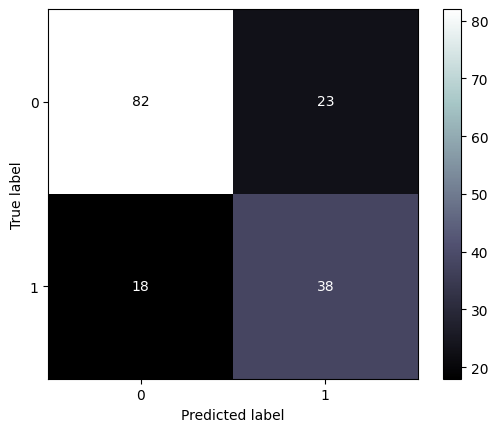

Métricas:
Accuracy score: 0.75
Precision score: 0.62
Recall score: 0.68
F1 score: 0.65


In [42]:
y_prediction = opt_logreg.predict(X_test)

print('Matriz de confusión:\n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_prediction))
disp.plot(cmap='bone')
plt.show()
print(f'Métricas:')
print(f'Accuracy score: {round(accuracy_score(y_test, y_prediction), 2)}')
print(f'Precision score: {round(precision_score(y_test, y_prediction), 2)}')
print(f'Recall score: {round(recall_score(y_test, y_prediction), 2)}')
print(f'F1 score: {round(f1_score(y_test, y_prediction), 2)}')